# Import Usefull Modules

In [16]:
#Modules Import
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
from scipy import stats
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing, cross_validation
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

plt.style.use('ggplot')

# Ignore Warning

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Read Data to Pandas DataFrame

In [3]:
#Read CSV File to Pandas DataFrame
data=pd.read_csv('train.csv')
features=data.drop("Survived",axis=1)
labels=data[["Survived"]]

# Function for Modifying Raw Data

In [4]:
def modify_data(features):
    useless_features=["PassengerId","Fare","Ticket","Name","Cabin","Age"]
    non_numerical_features=["Sex","Embarked"]

    features.drop(useless_features,inplace=True,axis=1)

    for feature in non_numerical_features:
        mapper=dict()
        for i, element in enumerate(set(features[feature])):
            mapper[element]=i
        features[feature]=features[[feature]].applymap(lambda x: mapper[x])
        
        temp_data=[]
    for i,feature in enumerate(features):
        temp_data.append((data[feature][:,np.newaxis]==data[feature].unique()).astype(int))
    
    features_matrix=[]
    for i in range(len(features.index)):
        features_matrix.append(np.concatenate([temp_data[feature][i] for feature in range(len(list(features)))]))

    features_matrix=np.array(features_matrix)
    
    return features,features_matrix

In [5]:
features,features_matrix = modify_data(features)
labels_matrix=np.array(labels)

# Compare Classifiers

		SVC
Average Accuracy : 80.04%
Maximum Accuracy : 87.0%
Minimum Accuracy : 73.09%


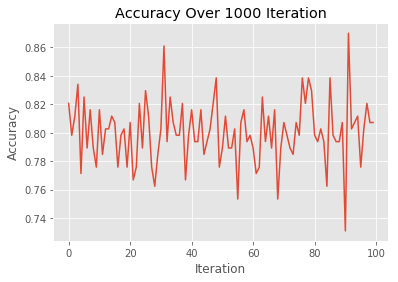


		DecisionTreeClassifier
Average Accuracy : 78.95%
Maximum Accuracy : 86.1%
Minimum Accuracy : 72.65%


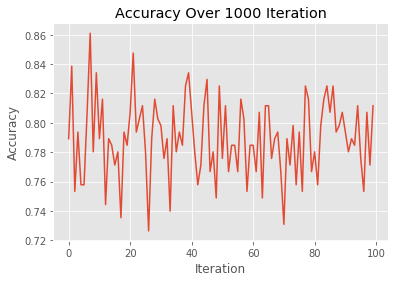


		RandomForestClassifier
Average Accuracy : 78.71%
Maximum Accuracy : 87.0%
Minimum Accuracy : 72.65%


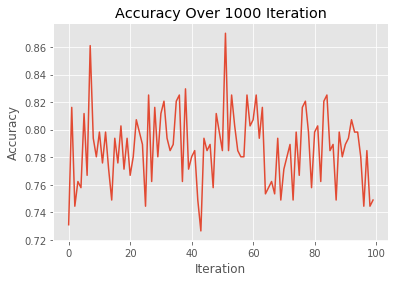

In [6]:
classifiers=["KNeighborsClassifier","SVC","DecisionTreeClassifier","RandomForestClassifier","AdaBoostClassifier","GaussianNB"]

for classifier in classifiers: 
    average_accuracy=[]
    exec('model={}()'.format(classifier))
    for i in range(100):
        features_train, features_test, labels_train, labels_test = train_test_split(features,labels,test_size=0.25)
        model.fit(features_train,labels_train)
        average_accuracy.append(model.score(features_test,labels_test))
        
    print("\t\t{}".format(classifier))
    print('Average Accuracy : {}%'.format(round(np.mean(average_accuracy)*100,2)))
    print('Maximum Accuracy : {}%'.format(round(np.max(average_accuracy)*100,2)))
    print('Minimum Accuracy : {}%'.format(round(np.min(average_accuracy)*100,2)))
    plt.plot(average_accuracy)
    plt.title("Accuracy Over 1000 Iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy")
    plt.show()
    print()

# Generate Prediction

In [48]:
model=SVC()
model.fit(features, labels)

test_data=pd.read_csv('test.csv')
test_features,test_features_matrix=modify_data(test_data)

prediction=model.predict(test_features)
prediction=pd.DataFrame(prediction,columns=["Survived"])

prediction["PassengerId"]=range(892,1310)
prediction=prediction[["PassengerId","Survived"]]

prediction.to_csv("prediction.csv",index=False)